## Simple Linear Regression Modeling


### An Example

In [1]:
import pandas as pd
df = pd.read_csv('Income1.csv')[['Education', 'Income']]
df.head()

,Education,Income
0,10.000000,26.658839
1,10.401338,27.306435
2,10.842809,22.132410
3,11.244147,21.169841
4,11.645485,15.192634


In [2]:
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('Income ~ Education', data=df, return_type='dataframe')
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
p = results.params
p

Intercept   -39.446257
Education     5.599483
dtype: float64

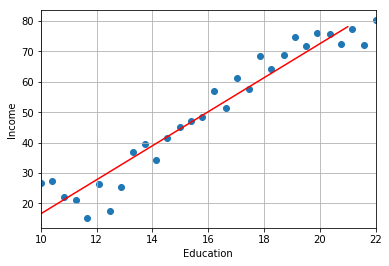

In [3]:
import matplotlib.pyplot as plt
xs = np.arange(10, 22)
# scatter-plot data
ax = df.plot(x='Education', y='Income', kind='scatter')

# plot regression line on the same axes, set x-axis limits
ax.plot(xs, p.Intercept + p.Education * xs, color='red')
ax.set_xlim([10, 22])
plt.show()


In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           8.63e-18
Time:                        09:33:58   Log-Likelihood:                -93.500
No. Observations:                  30   AIC:                             191.0
Df Residuals:                      28   BIC:                             193.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.4463      4.725     -8.349      0.000     -49.125     -29.768
Education      5.5995      0.288     19.431      0.000       5.009       6.190
==============================================================================
Omnibus:                        1.166   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.774
Skew:                          -0.391   Prob(JB):                        0.679
Kurtosis:                       2.916   Cond. No.                         75.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How is this calculation performed?  There are basically two common ways to achieve the Linear regression.  One is to calculated the Linear Least Squares of the data to get a value for m that mimiizes the total squared distance of each point in the data set from the line.  We derive the Least Squares method below.

### Least Square Method of Fitting - Derivation
Least Squares is often used to solve linear regression when the number of rows of training data is not large.  (order of 1000 or less).  With large data sets, least squares will have problems with running slow, using too much memory and cpu, and numerical stability.  

We can derive the least squares algorithm by looking at the difference between our actual data and what the prediction with look like.  Our actual data can be represented by $y_i$ for $i=1..n$.  our guess will be a line that approximates $y$ as $\hat{y} = \beta_0 + \beta_1x$.  then at each point in the dataset we can calculate the squared error for one point:
$$ (y_i - \hat{y_i})^2 = (y_i - \beta_0 - \beta_1x_i)^2 = R^2$$
$R^2$ is known as the *squared residual*.  We will see $R^2$ and $R$ are important values for determining the quality of the regression. Now the line we derive should minimize $R^2$ over all the data:
$$ min\sum_{i}^{N}(y_i - \hat{y_i})^2  = min\sum_{i}^{N}(y_i - \beta_0 - \beta_1x_i)^2 $$
We can find the is minimum by taking the derivative of this function with respect to each $\beta_j$ and then finding the values for $\beta_0$ and $\beta_1$.
$$\frac{\partial{R^{2}_{min}}}{\partial{\beta_0}} = -2\sum_{i}^{N}(y_i - \beta_0 - \beta_1x_i) = 0$$
and,
$$\frac{\partial{R^{2}_{min}}}{\partial{\beta_1}} = -2\sum_{i}^{N}(y_i - \beta_0 - \beta_1x_i)x_i = 0$$
We will complete the derivation for $\beta_1$ and use the result to calculate $\beta_0$.

The equation above for the derivative with respect to $\beta_0$ and $\beta_1$ is equal to zero at the minimum, so we can reformulate those equations as below.  First the derivative with respect to $\beta_0$:
$$\sum_i^Ny_i = \sum_i^N(\beta_0 + \beta_1x_i) = N\beta_0 + \beta_1\sum_i^Nx_i$$
dividing through by N gives:
$$\bar{y} = \beta_0 + \beta_1\bar{x},$$
so,
$$\beta_0 = \bar{y} - \beta_1\bar{x}.$$



Now we will look at the derivative with respect to $\beta_1$ and substitute the expression for $\beta_0$

$$\sum_i^Ny_ix_i = \sum_i^N(\beta_0 + \beta_1x_i)x_i = \beta_0\sum_i^Nx_i + \beta_1\sum_i^Nx_i^2 = \beta_0\bar{x}N + \beta_1\sum_i^Nx_i^2$$



$$ = \bar{y}\bar{x}N-\beta_1\bar{x}^2N +\beta_1\sum_i^Nx_i^2 = N\bar{y}\bar{x}+\beta_1(\sum_i^Nx_i^2-N\bar{x}^2)$$
Then


$$\beta_1 = \frac{\sum_i^Ny_ix_i - N\bar{y}\bar{x}}{\sum_i^Nx_i^2 - N\bar{x}^2}$$

Now we can use the expressions we derived above for $\beta_0$ and $\beta_1$ to calculate them directly from the data.  We are using the Income/Education data above:

In [5]:
N = df.shape[0]
sum_x = sum(df['Education'])
sum_x2 = sum(df['Education']**2)
bar_x = sum_x/N

sum_y = sum(df['Income'])
sum_xy = sum(df['Income'] * df['Education'])
bar_y = sum_y/N

beta_1 = (sum_xy - N*bar_x * bar_y)/(sum_x2 - N*bar_x**2)
beta_0 = bar_y - beta_1*bar_x
(beta_0, beta_1)

(-39.446256679096756, 5.5994828741199552)

These are the same coefficients we saw from the OLS function we used for the graph above, so we would expect the graph of the line to look the same:

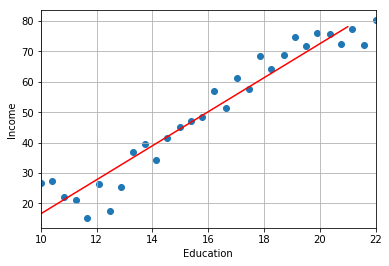

In [6]:
xs = np.arange(10, 22)
# scatter-plot data
ax = df.plot(x='Education', y='Income', kind='scatter')

# plot regression line on the same axes, set x-axis limits
ax.plot(xs, beta_0 + beta_1 * xs, color='red')
ax.set_xlim([10, 22])
plt.show()


## Evaluating the Resulting Model
We have shown how to calculate the simple model.  Now let's think about how we can tell if the model actually approximates the data.  This is necessary if we want to infer relationships in the data or to predict new values using the model.

The model is designed to minimize the squared difference between the actual and the predicted values.  The difference between actual and predicted values is called the **Residuals**.  The sum of the residuals (usually symbolized by $RS$) in a good model will be close to zero, and the sum of the squared residuals ($RSS$) will also be small.  Since residuals can be negative, it's important to look at both $RS$ and $RSS$ because $RS$ may be near zero, but $RSS$ may be much larger.

What are $RS$ and $RSS$ for our example?
$$RS = \sum_i^N(y_i - \hat{y_i}),$$
and 
$$RSS = \sum_i^N(y_i - \hat{y_i})^2.$$

In [7]:
hat_f = lambda x:(beta_0 + beta_1*x)
RS = sum(df['Income']-hat_f(df['Education']))
RSS = sum(df['Income']-hat_f(df['Education']))**2
(RS, RSS)

(4.4053649617126212e-13, 1.9407240445885244e-25)

These are exceptionally good results.  The usual statistical explanation for $RSS >> 0$ is that the variance of the residual for each data point is accounted for in the model.  The residuals should also be tested for their closeness to a normal distribution.

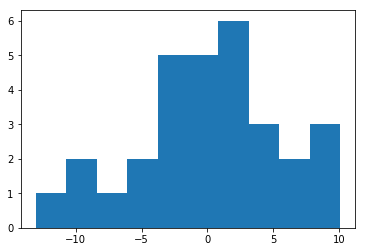

In [10]:
Residuals = df['Income']-df['Education'].apply(hat_f)

plt.hist(Residuals, bins=10)
plt.show()

If you squint your eyes and imagine more data, there is a definite tendency toward normal distribution.  We can (and should!) test this further.

### Does This Model Fit the Data?
Let's retreat from $RSS$ for a while and look at the parameters of $\hat{f}$ that are estimated by the method above.  As with our estimate for $f$, estimates for $\beta_0$ and $\beta_1$ are not the *actual* values for the parameters.  We can think instead of the $\beta_i$ parameters as **random variables**.  Random variables are any quantity that can take more than one value, but usually with respect to some probability distribution.  So for some random variable $X$ we can expect that the there is some mean and variance among possible values for $X$.

For the $\beta$ parameters, we have calculated the sample mean using the method described above, but what is the variance according the data?

We use a concept called **Standard Error** (SE) to talk about the quality of these calculated parameters we are using to calculate income with respect to years of education.    The standard error is a measure of the uncertainty of our estimates for the $\beta$ parameters.

Squared standard error is calculated for each $\beta$ like this:

$$SE(\beta_0)^2 = \sigma^2\left\{\frac{1}{N} + \frac{\bar{x}^2}{\sum_i^N(x_i - \bar{x})^2}\right\},$$
and,
$$SE(\beta_1)^2 = \frac{\sigma^2}{\sum_i^N(x_i - \bar{x})^2}.$$


where $\sigma^2$ is the variance of the actual (unknown) error, $Var(\epsilon).$  We can estimate $\sigma$ using the *Residual Squared Error* ($RSE$) calculated as:

$$RSE = \sqrt{\frac{RSS}{n-2}}.$$

The standard error ($SE$) helps us estimate an important statistic: *What is the likelihood of finding the estimated $\beta$ in the interval $[2SE(\beta) \pm \beta]?$*  This calculation gives us a **Confidence Interval** for the coefficients of the model.  